In [1]:
#importing documents used
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
survey = pd.read_csv("C:/Users/chaukt1/Desktop/Survey.csv")

In [3]:
survey.head()

,Hole_ID,Depth (m),Azimuth (Degree),Dip (Degree),target
0,KRED207,0.0,128.9,-60.0,1
1,KRED207,50.0,128.9,-60.0,1
2,KRED207,104.0,127.9,-59.0,1
3,KRED209,0.0,121.6,-57.5,1
4,KRED209,50.0,121.6,-57.5,1


In [4]:
survey.shape

(278, 5)

In [5]:
survey.dtypes

Hole_ID              object
Depth (m)           float64
Azimuth (Degree)    float64
Dip (Degree)        float64
target                int64
dtype: object

In [6]:
survey.isna().any()

Hole_ID             False
Depth (m)           False
Azimuth (Degree)    False
Dip (Degree)        False
target              False
dtype: bool

In [7]:
survey.columns

Index(['Hole_ID', 'Depth (m)', 'Azimuth (Degree)', 'Dip (Degree)', 'target'], dtype='object')

In [8]:
from sdv.constraints import FixedCombinations

In [9]:
Location = FixedCombinations(column_names=['Depth (m)', 'Azimuth (Degree)', 'Dip (Degree)'])

In [10]:
from sdv.constraints import Negative
dip= Negative(column_name='Dip (Degree)')

In [11]:
constraints = [Location, dip]

In [12]:
from sdv.tabular import CTGAN

In [13]:
batch_size = 1000
epochs = 100

model = CTGAN(primary_key='Hole_ID',constraints=constraints, generator_dim=(256, 256, 256),
              discriminator_dim=(256, 256, 256), batch_size=batch_size, epochs=epochs, verbose=True)
model.fit(survey)

Epoch 1, Loss G:  5.7006,Loss D:  0.0000
Epoch 2, Loss G:  5.7095,Loss D: -0.0036
Epoch 3, Loss G:  5.6937,Loss D:  0.0048
Epoch 4, Loss G:  5.6943,Loss D:  0.0019
Epoch 5, Loss G:  5.6754,Loss D: -0.0074
Epoch 6, Loss G:  5.6801,Loss D: -0.0007
Epoch 7, Loss G:  5.6534,Loss D: -0.0059
Epoch 8, Loss G:  5.6676,Loss D:  0.0047
Epoch 9, Loss G:  5.6633,Loss D:  0.0020
Epoch 10, Loss G:  5.6451,Loss D:  0.0060
Epoch 11, Loss G:  5.6176,Loss D:  0.0040
Epoch 12, Loss G:  5.6400,Loss D:  0.0072
Epoch 13, Loss G:  5.6513,Loss D:  0.0109
Epoch 14, Loss G:  5.6298,Loss D:  0.0143
Epoch 15, Loss G:  5.6356,Loss D:  0.0117
Epoch 16, Loss G:  5.6454,Loss D:  0.0072
Epoch 17, Loss G:  5.6571,Loss D: -0.0138
Epoch 18, Loss G:  5.6273,Loss D:  0.0085
Epoch 19, Loss G:  5.6464,Loss D:  0.0198
Epoch 20, Loss G:  5.6152,Loss D:  0.0039
Epoch 21, Loss G:  5.6335,Loss D:  0.0078
Epoch 22, Loss G:  5.6392,Loss D:  0.0024
Epoch 23, Loss G:  5.6170,Loss D: -0.0008
Epoch 24, Loss G:  5.6023,Loss D: -0.0046
E

In [14]:
n_generated_data = 278
new_survey = model.sample(n_generated_data)

Sampling rows: 100%|██████████| 278/278 [00:00<00:00, 4796.15it/s]


In [15]:
from sdv.evaluation import evaluate

In [16]:
from sdv.evaluation import evaluate

evaluate(new_survey, survey)

0.447841726618705

In [17]:
from table_evaluator import load_data, TableEvaluator

In [18]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(survey, new_survey)
table_evaluator.evaluate(target_col='target')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.4107   0.5536              0.3333
DecisionTreeClassifier_real   1.0000   0.3036              0.1789
LogisticRegression_fake       0.4107   0.5893              0.4000
LogisticRegression_real       1.0000   0.2143              0.1200
MLPClassifier_fake            0.4107   0.5179              0.1667
MLPClassifier_real            0.9821   0.2321              0.1429
RandomForestClassifier_fake   0.4107   0.4464              0.1667
RandomForestClassifier_real   1.0000   0.2857              0.1667

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    1.0337
nearest neighbor std                     0.1501

Miscellaneous results:
                                  Result
Column Cor

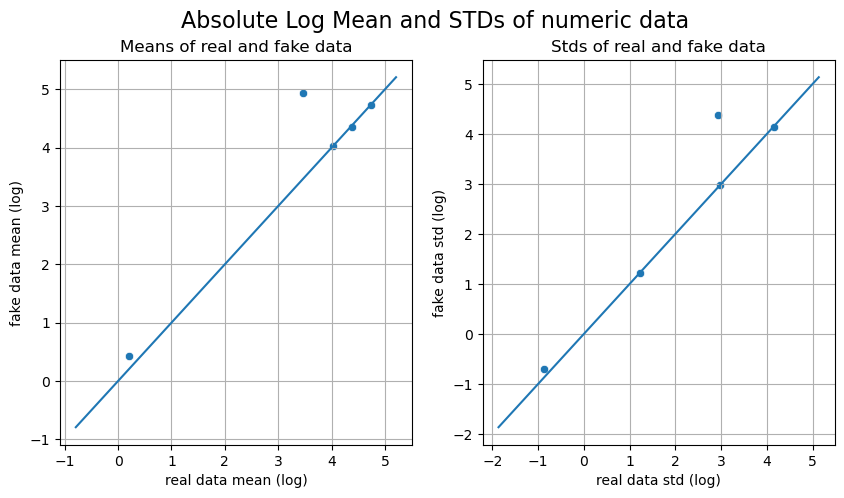

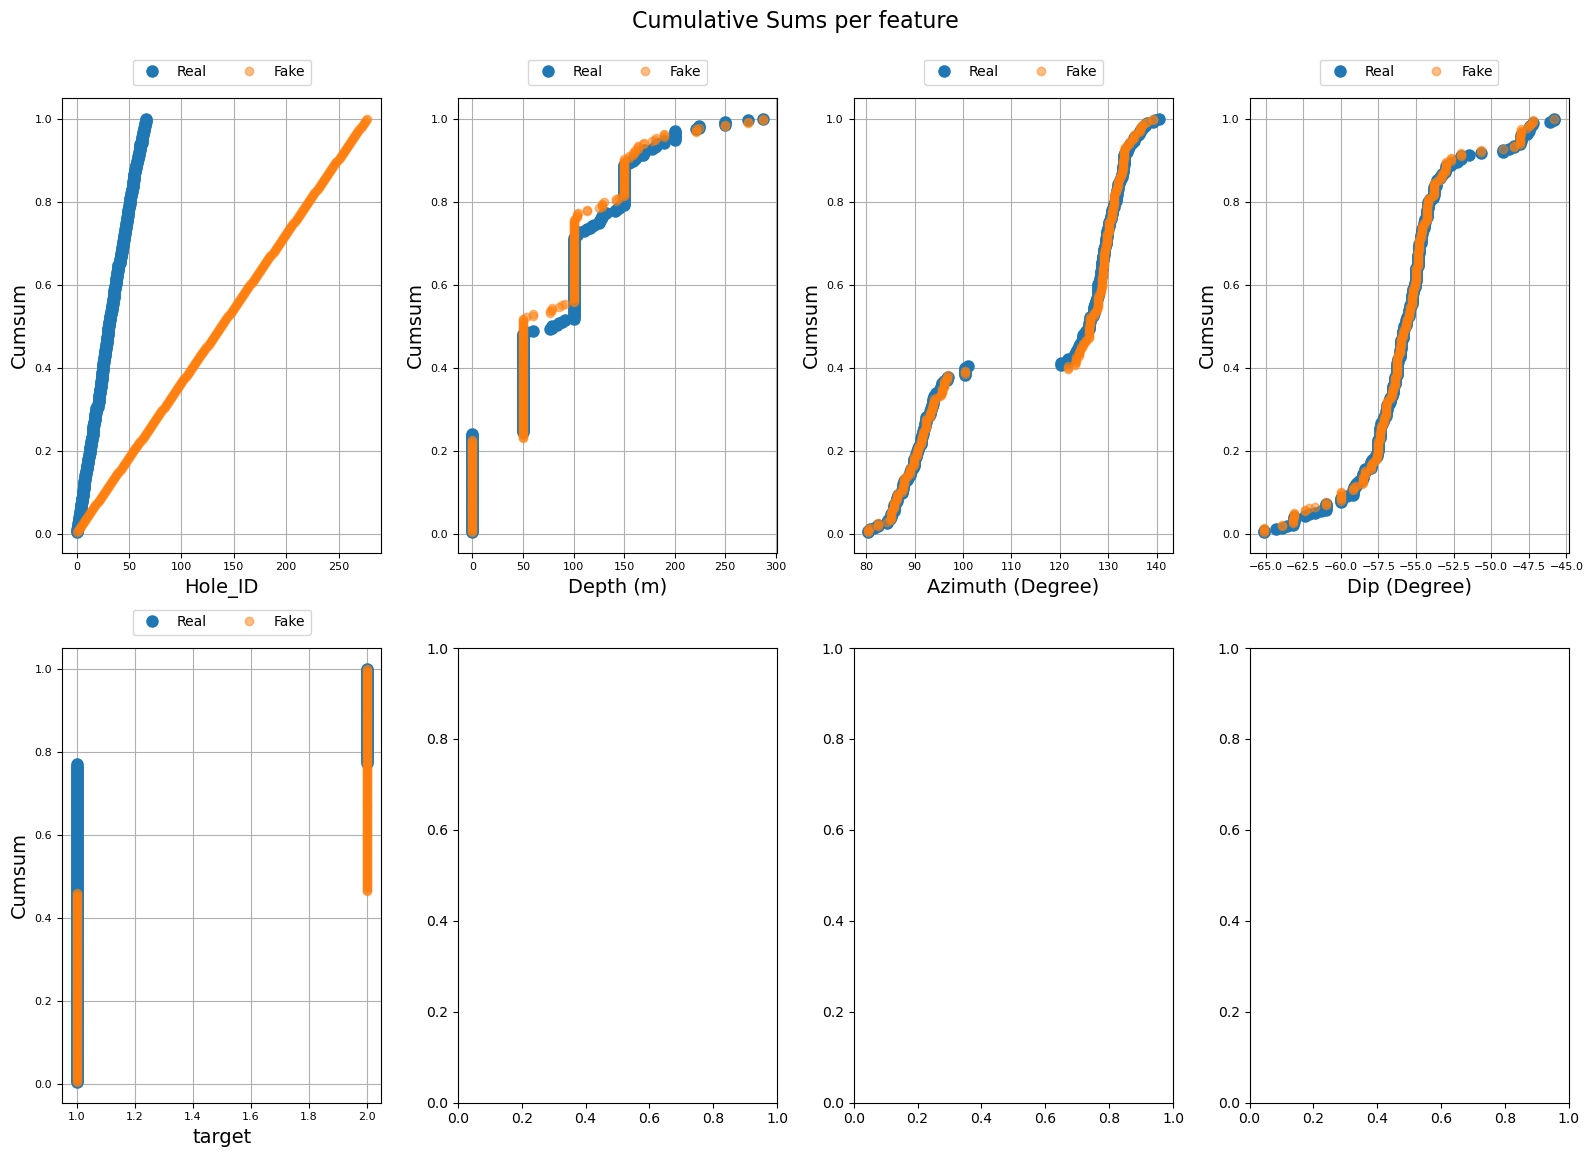

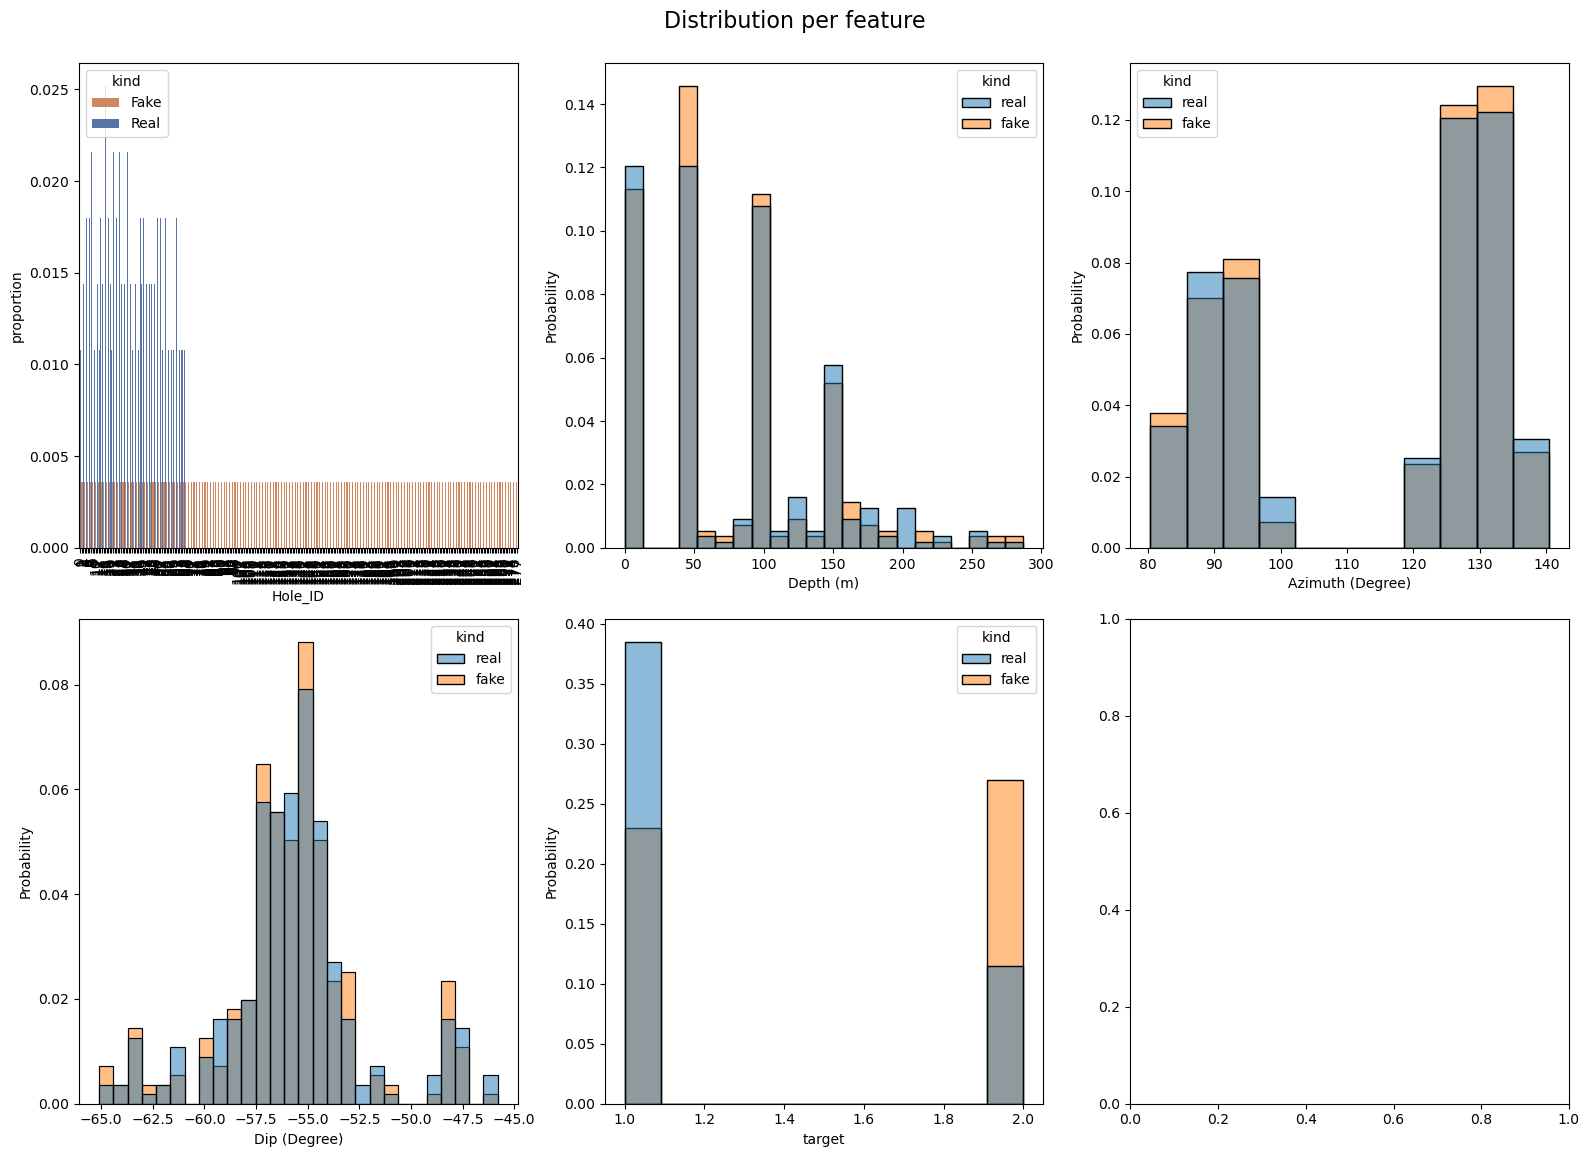

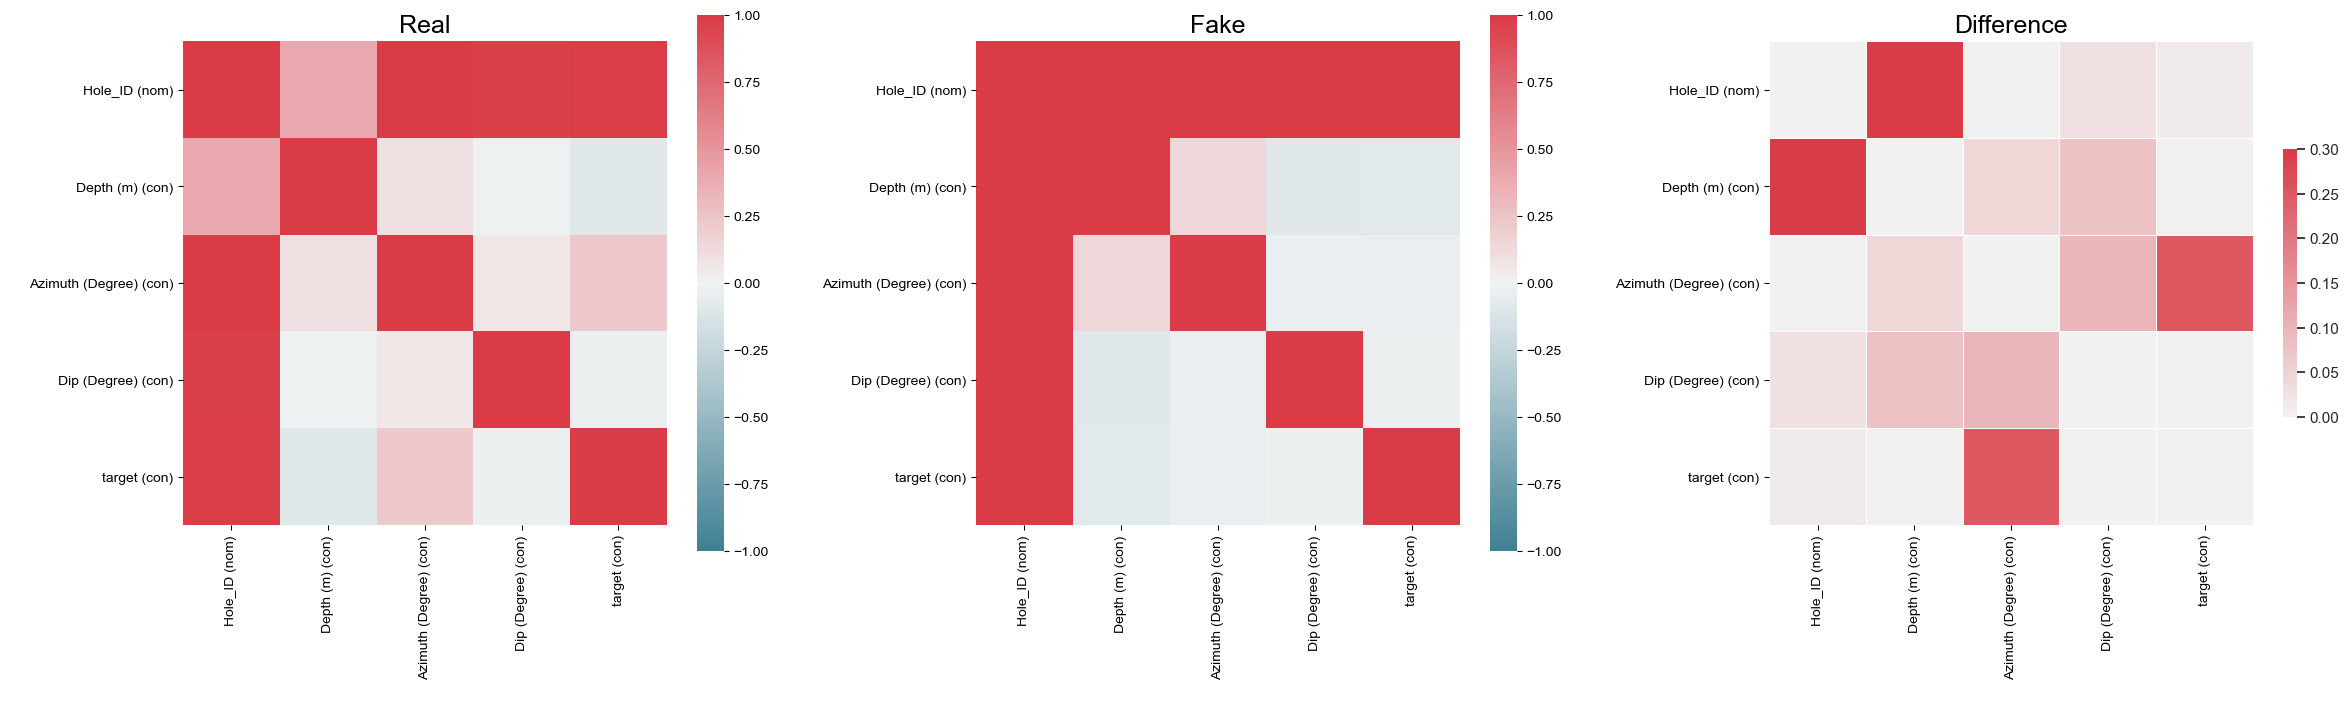

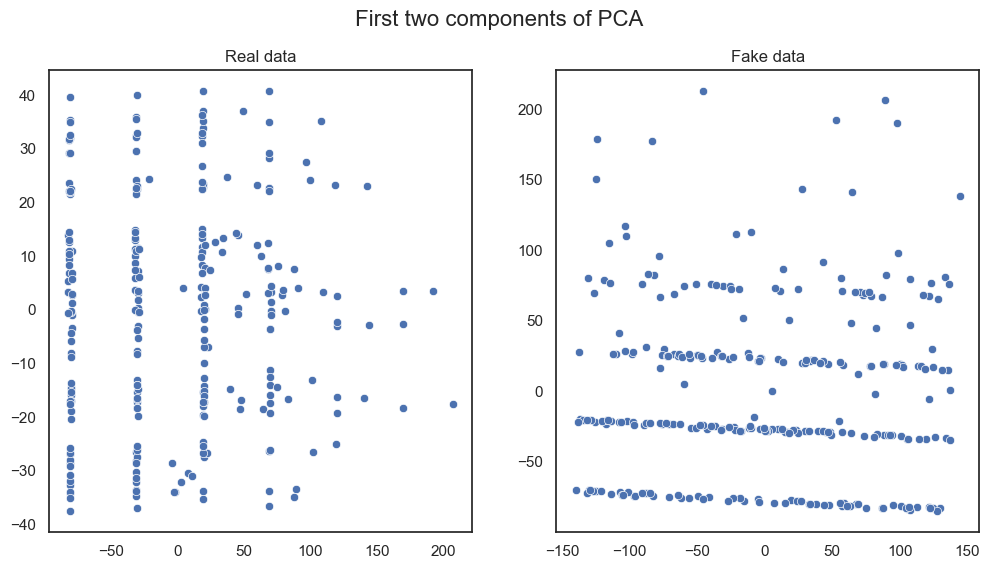

In [19]:
table_evaluator.visual_evaluation()

In [20]:
from sdv.tabular import CopulaGAN

In [21]:
model = CopulaGAN(primary_key='Hole_ID',
                 constraints=constraints,epochs=100,batch_size=2000,
                  generator_dim=(256, 256, 256),discriminator_dim=(256, 256, 256),verbose=True)
model.fit(survey)
new_data = model.sample(278)
new_data.head()

Epoch 1, Loss G:  5.7216,Loss D:  0.0014
Epoch 2, Loss G:  5.7178,Loss D:  0.0002
Epoch 3, Loss G:  5.6948,Loss D: -0.0034
Epoch 4, Loss G:  5.6920,Loss D: -0.0013
Epoch 5, Loss G:  5.6851,Loss D:  0.0009
Epoch 6, Loss G:  5.6782,Loss D: -0.0021
Epoch 7, Loss G:  5.6738,Loss D: -0.0010
Epoch 8, Loss G:  5.6634,Loss D:  0.0015
Epoch 9, Loss G:  5.6506,Loss D:  0.0002
Epoch 10, Loss G:  5.6380,Loss D: -0.0013
Epoch 11, Loss G:  5.6411,Loss D:  0.0029
Epoch 12, Loss G:  5.6295,Loss D:  0.0040
Epoch 13, Loss G:  5.6174,Loss D:  0.0052
Epoch 14, Loss G:  5.6248,Loss D:  0.0068
Epoch 15, Loss G:  5.6020,Loss D:  0.0082
Epoch 16, Loss G:  5.5829,Loss D:  0.0115
Epoch 17, Loss G:  5.5886,Loss D:  0.0111
Epoch 18, Loss G:  5.5860,Loss D:  0.0203
Epoch 19, Loss G:  5.5775,Loss D:  0.0211
Epoch 20, Loss G:  5.5825,Loss D:  0.0170
Epoch 21, Loss G:  5.5834,Loss D:  0.0241
Epoch 22, Loss G:  5.5929,Loss D:  0.0104
Epoch 23, Loss G:  5.6044,Loss D: -0.0063
Epoch 24, Loss G:  5.5962,Loss D: -0.0158
E

Sampling rows: 100%|██████████| 278/278 [00:00<00:00, 2916.40it/s]


,Hole_ID,Depth (m),Azimuth (Degree),Dip (Degree),target
0,a,50.0000,92.1000,-57.3000,2
1,b,0.0000,132.1000,-56.3000,2
2,c,0.0000,137.6000,-56.8000,1
3,d,0.0000,88.7000,-53.0000,2
4,e,150.0000,133.2000,-55.7000,2


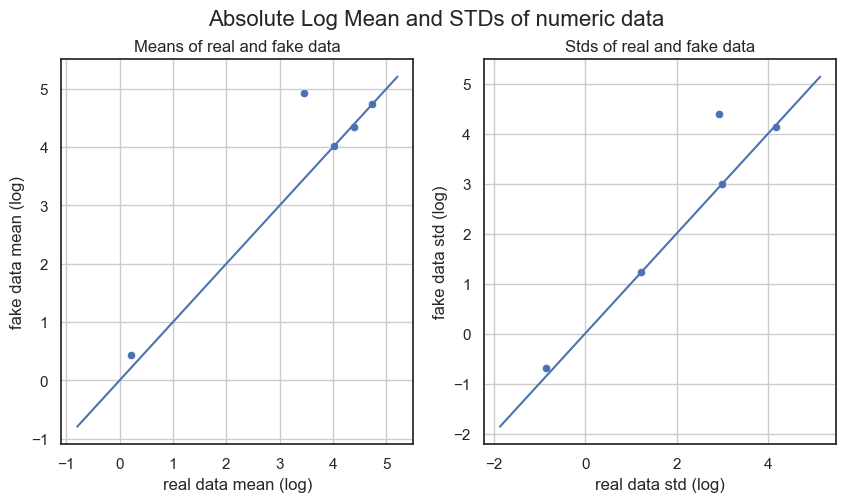

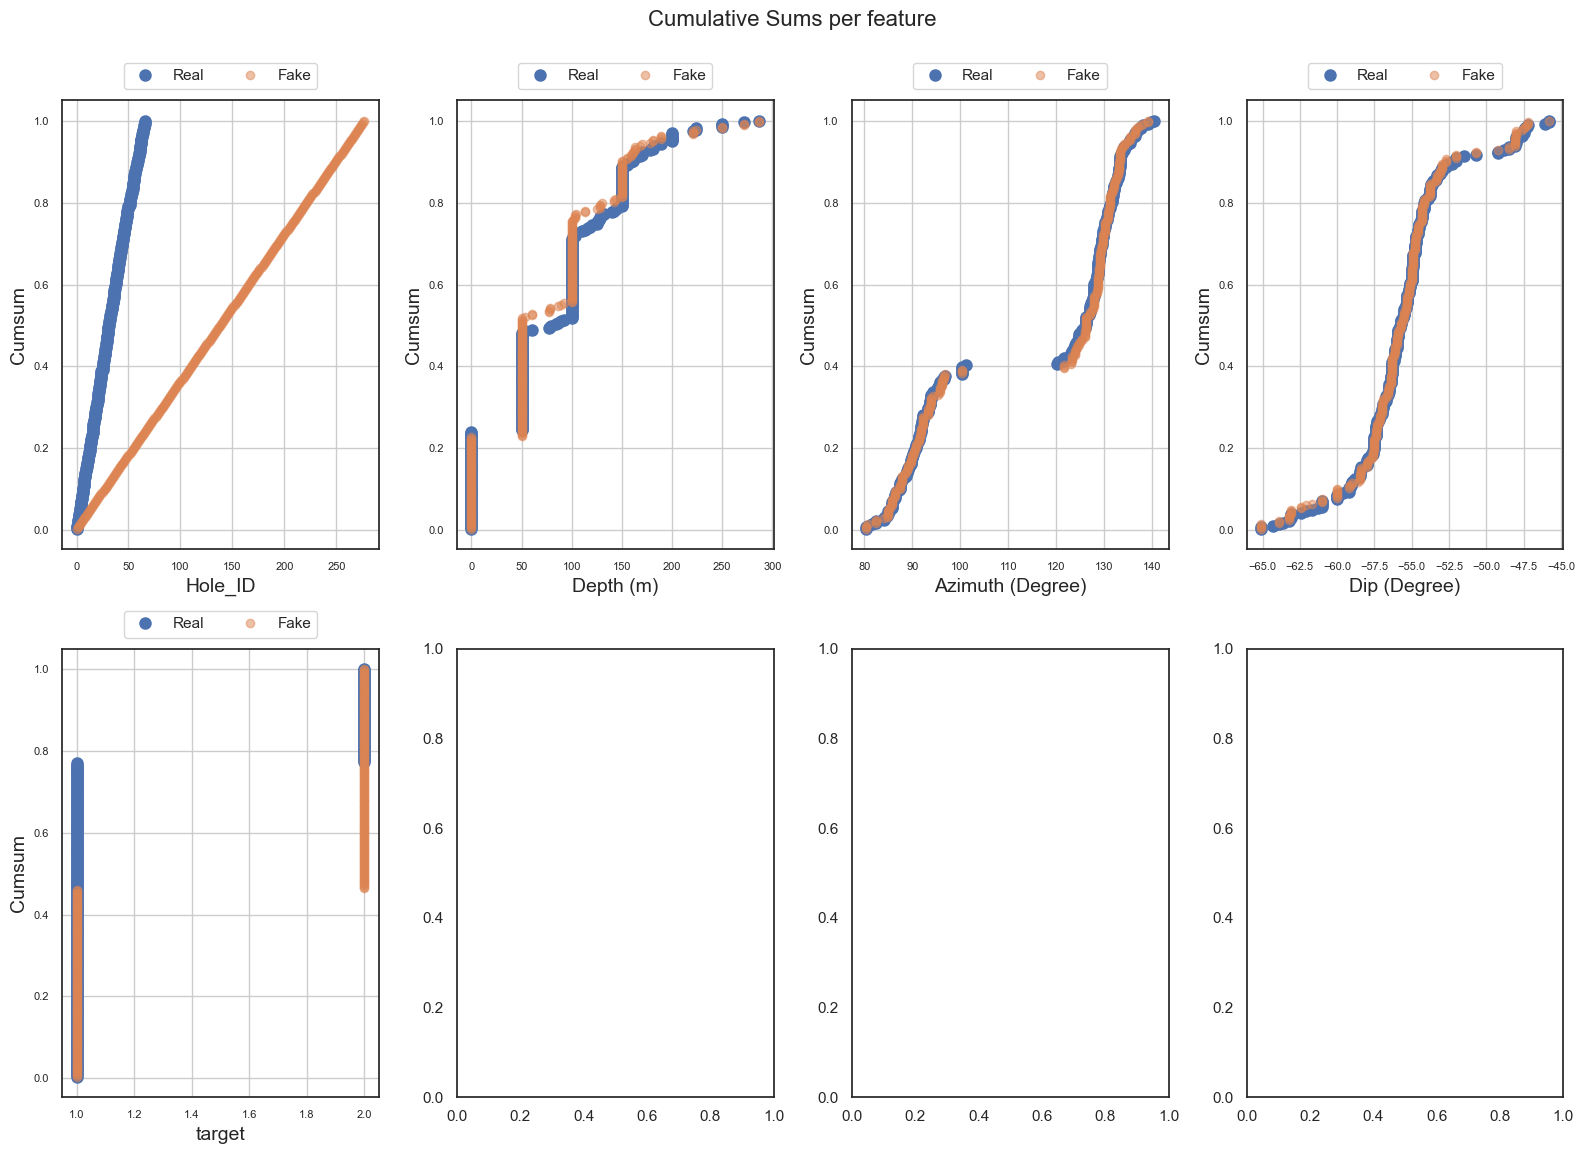

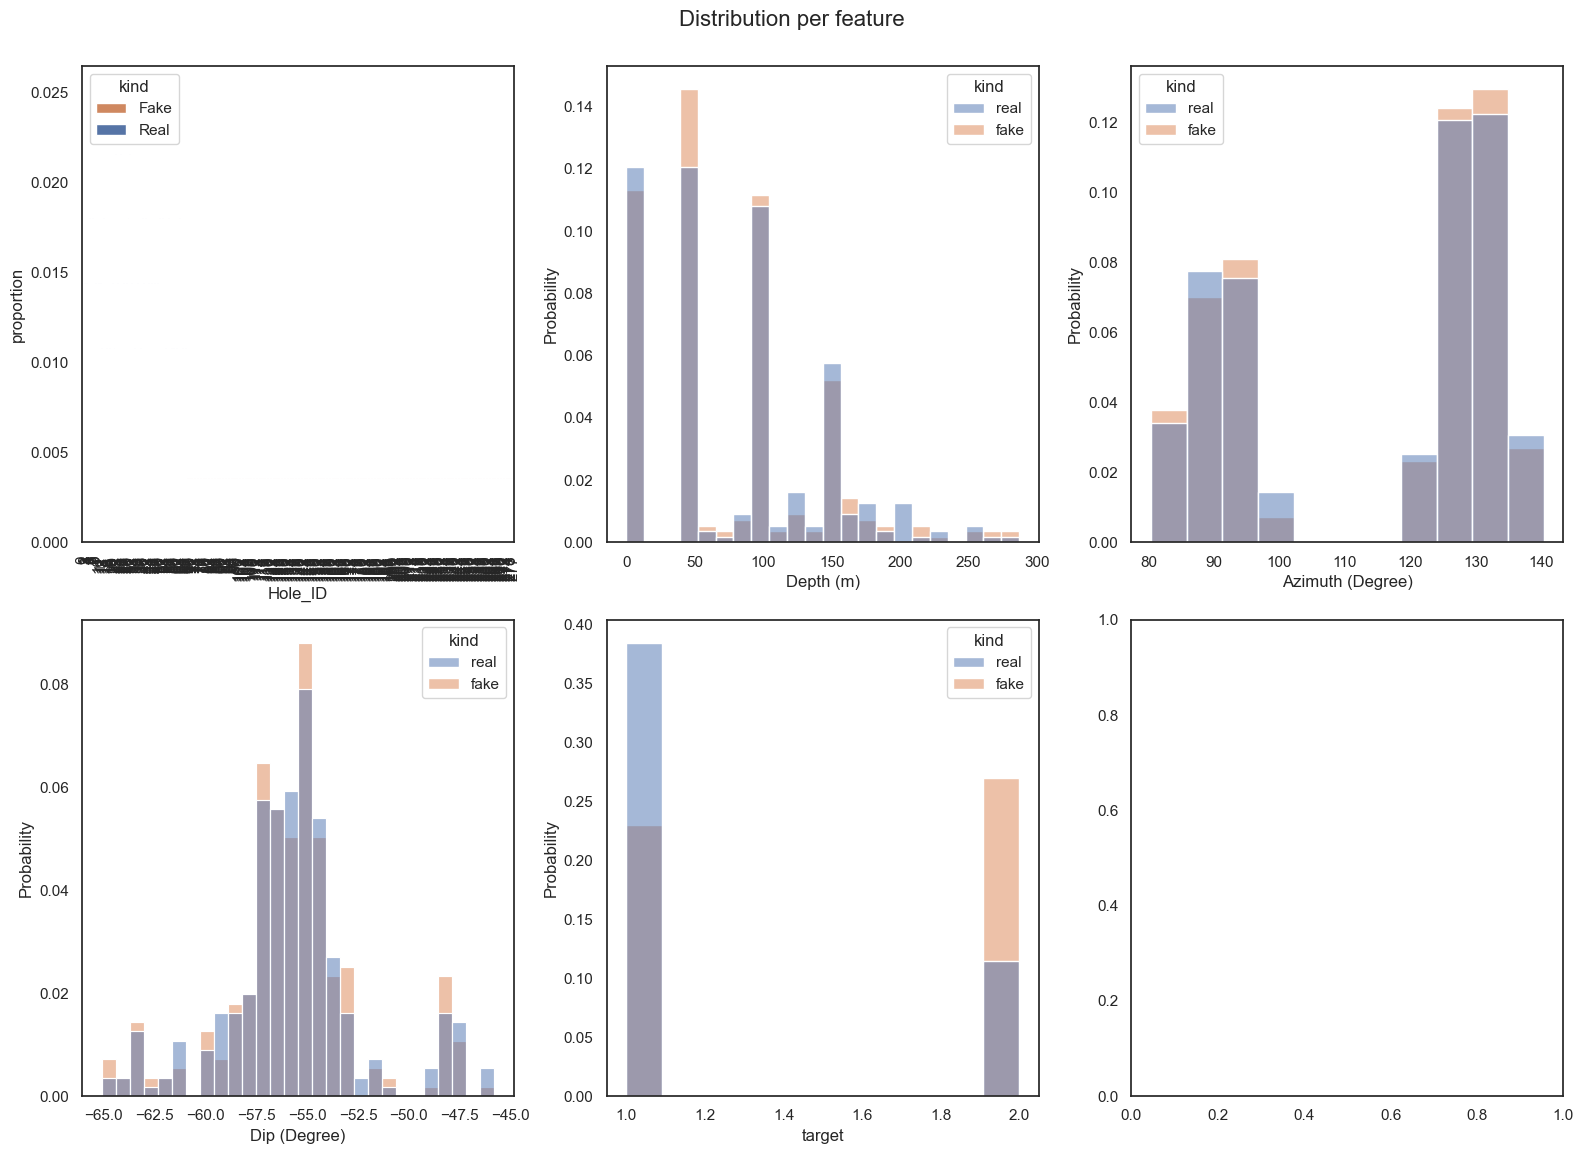

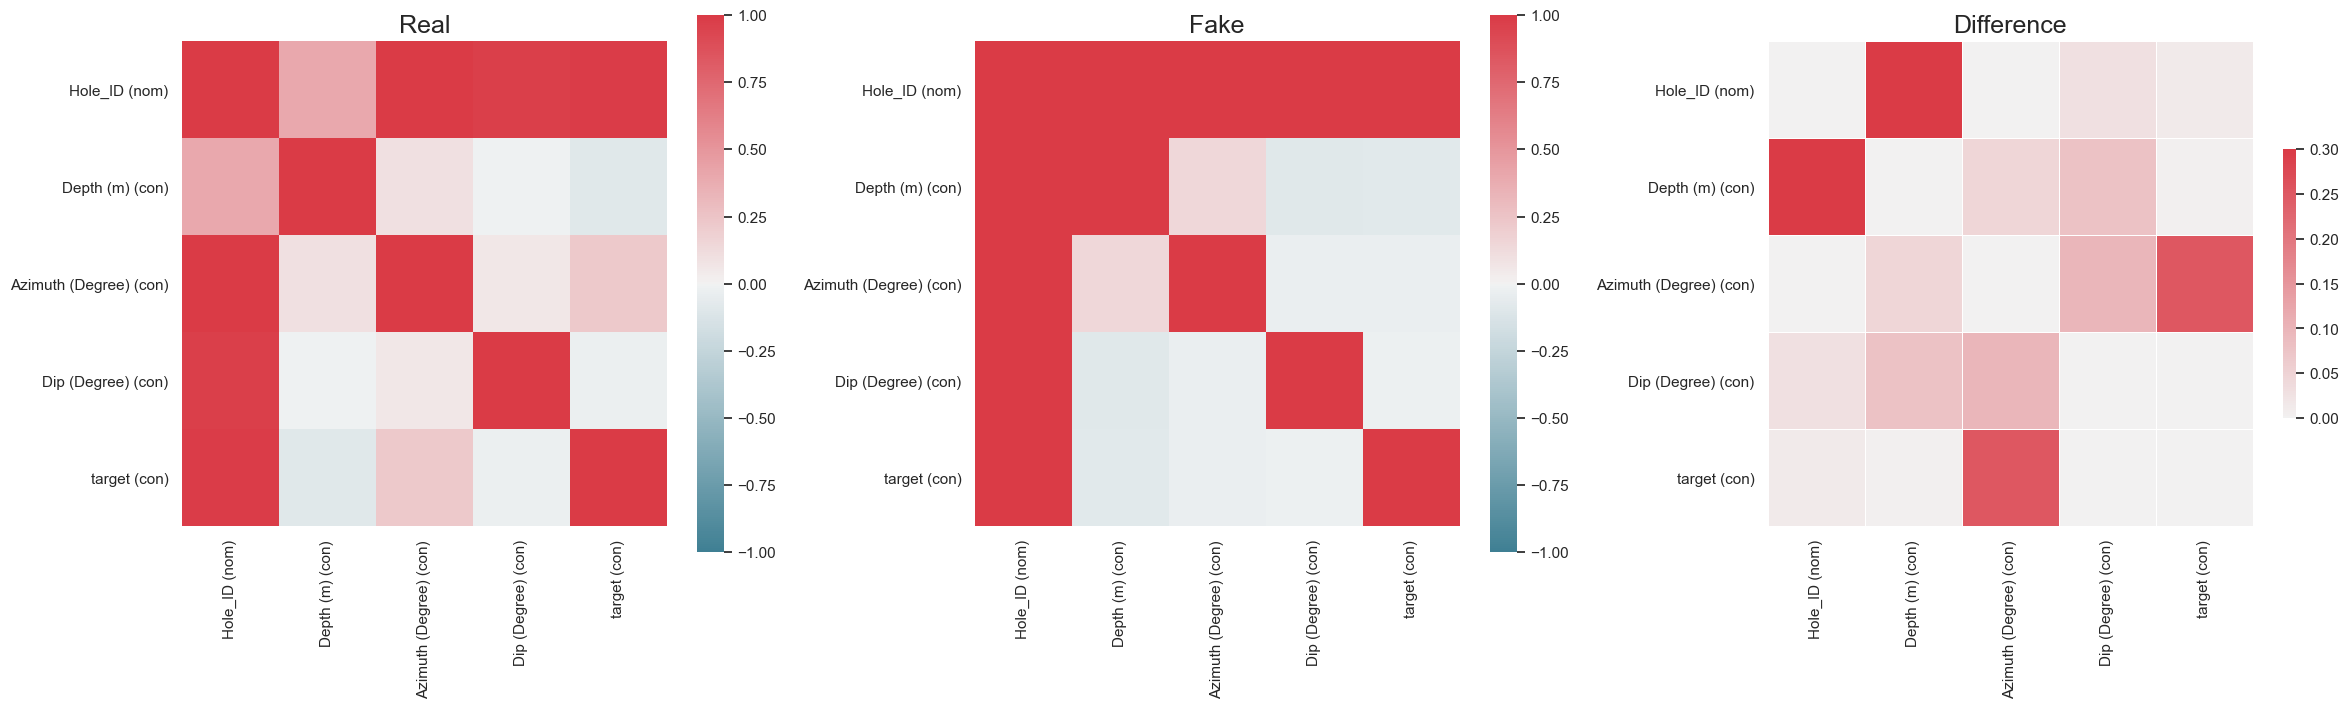

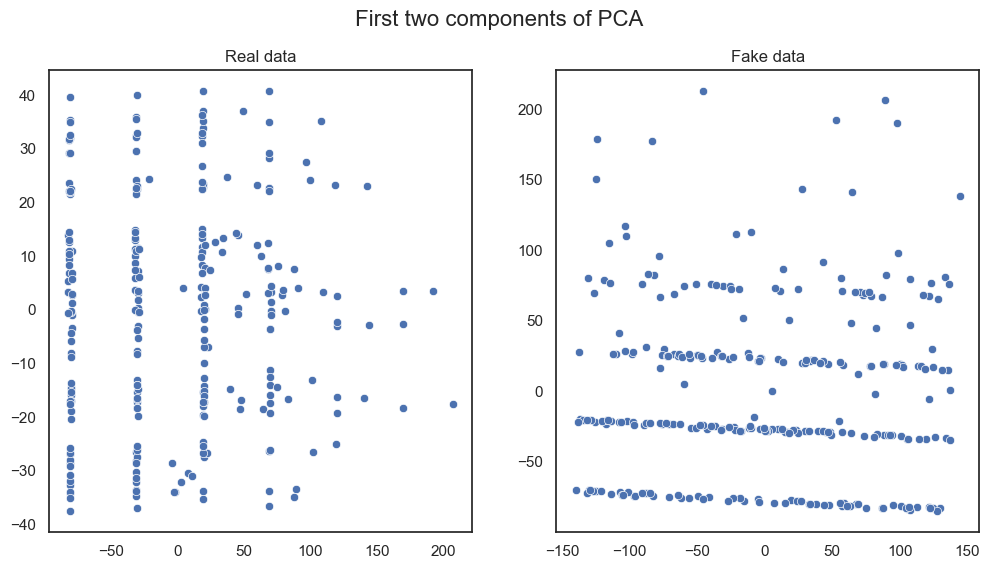

In [22]:
table_evaluator.visual_evaluation()

In [23]:
from sdv.evaluation import evaluate

evaluate(new_data, survey)

0.447841726618705

In [24]:
from sdv.tabular import GaussianCopula

In [25]:
model = GaussianCopula(primary_key='Hole_ID',constraints=constraints,
                      field_distributions={'Dip (Degree)': 'beta'})
model.fit(survey)
new_data2 = model.sample(278)
new_data2.head()

Sampling rows: 100%|██████████| 278/278 [00:00<00:00, 14112.32it/s]


,Hole_ID,Depth (m),Azimuth (Degree),Dip (Degree),target
0,a,100.0000,85.7000,-55.0000,1
1,b,78.5000,133.4000,-55.5000,2
2,c,100.0000,81.6000,-57.2000,1
3,d,224.0000,124.8000,-59.1000,1
4,e,200.0000,91.8000,-56.0000,1


In [26]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(survey, new_data2)
table_evaluator.evaluate(target_col='target')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.4464   0.6786              0.3494
DecisionTreeClassifier_real   1.0000   0.7857              0.6471
LogisticRegression_fake       0.4464   0.6071              0.1089
LogisticRegression_real       1.0000   0.7143              0.5556
MLPClassifier_fake            0.4464   0.6964              0.3023
MLPClassifier_real            0.9821   0.6786              0.5342
RandomForestClassifier_fake   0.4286   0.6964              0.2874
RandomForestClassifier_real   1.0000   0.8571              0.7500

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    0.9941
nearest neighbor std                     0.1609

Miscellaneous results:
                                  Result
Column Cor

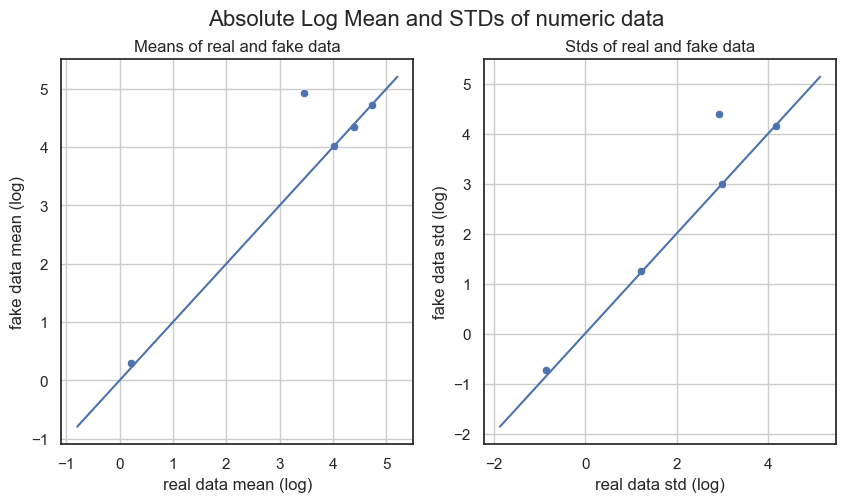

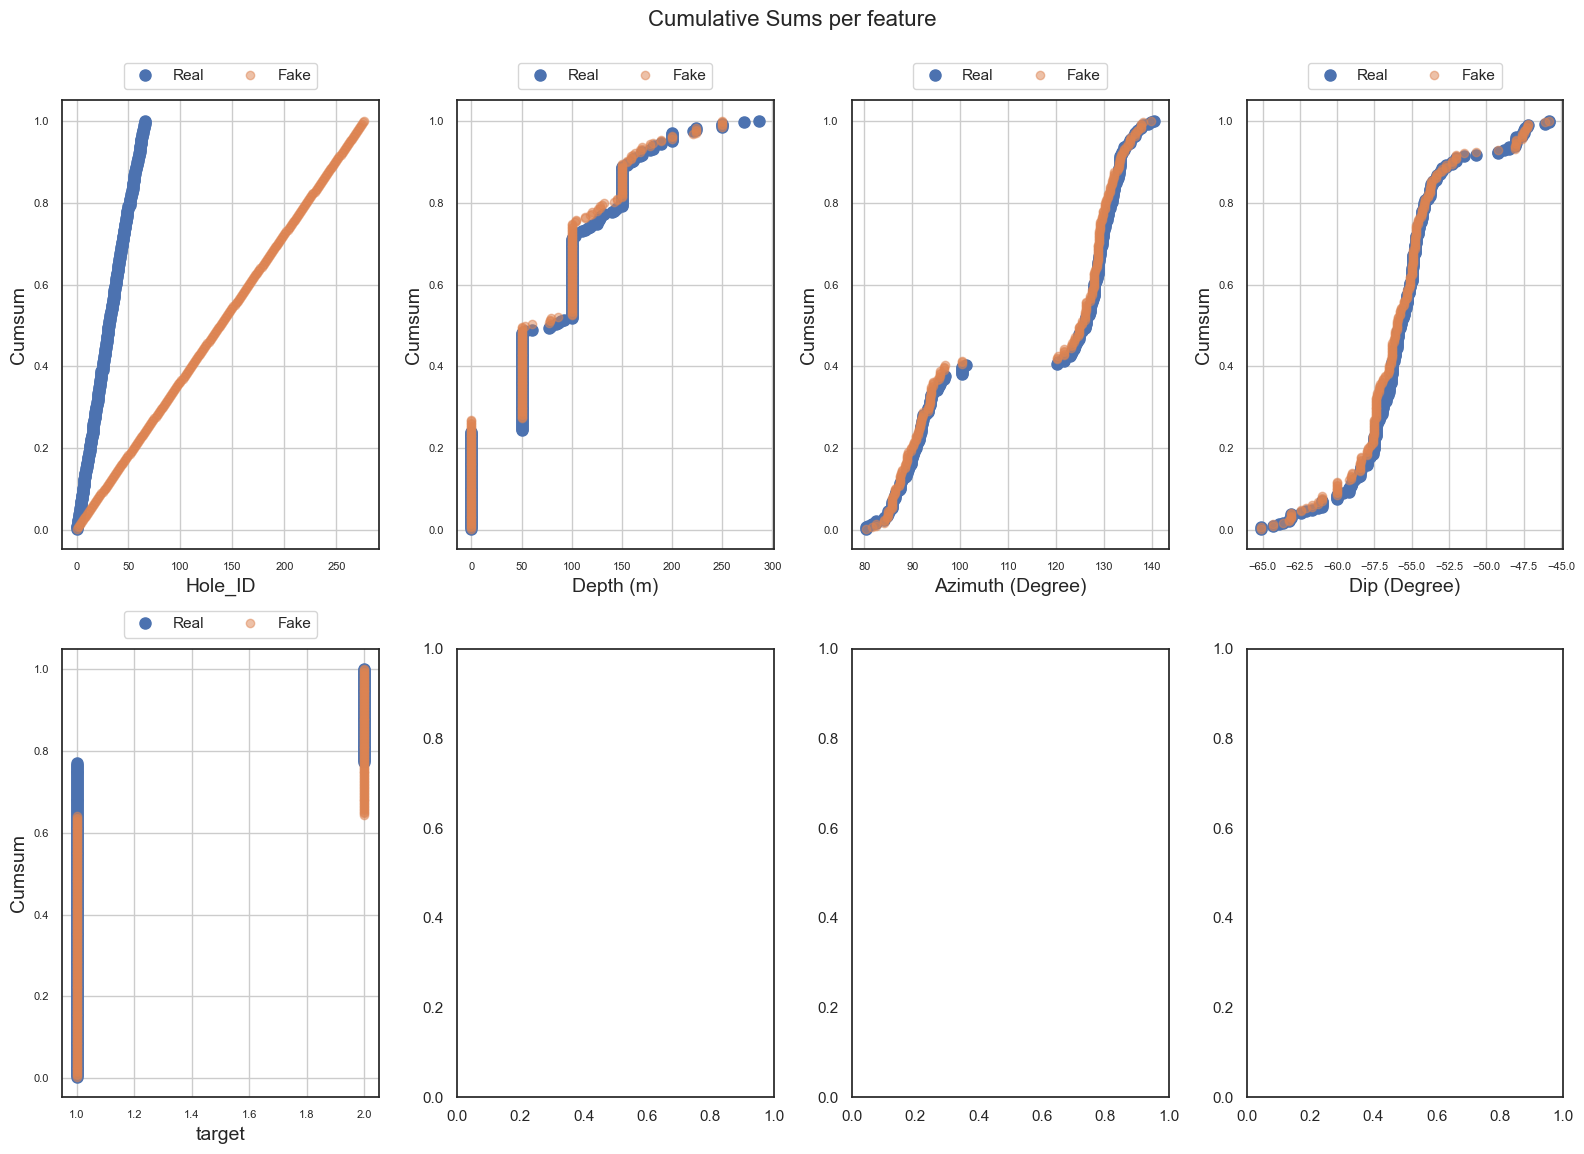

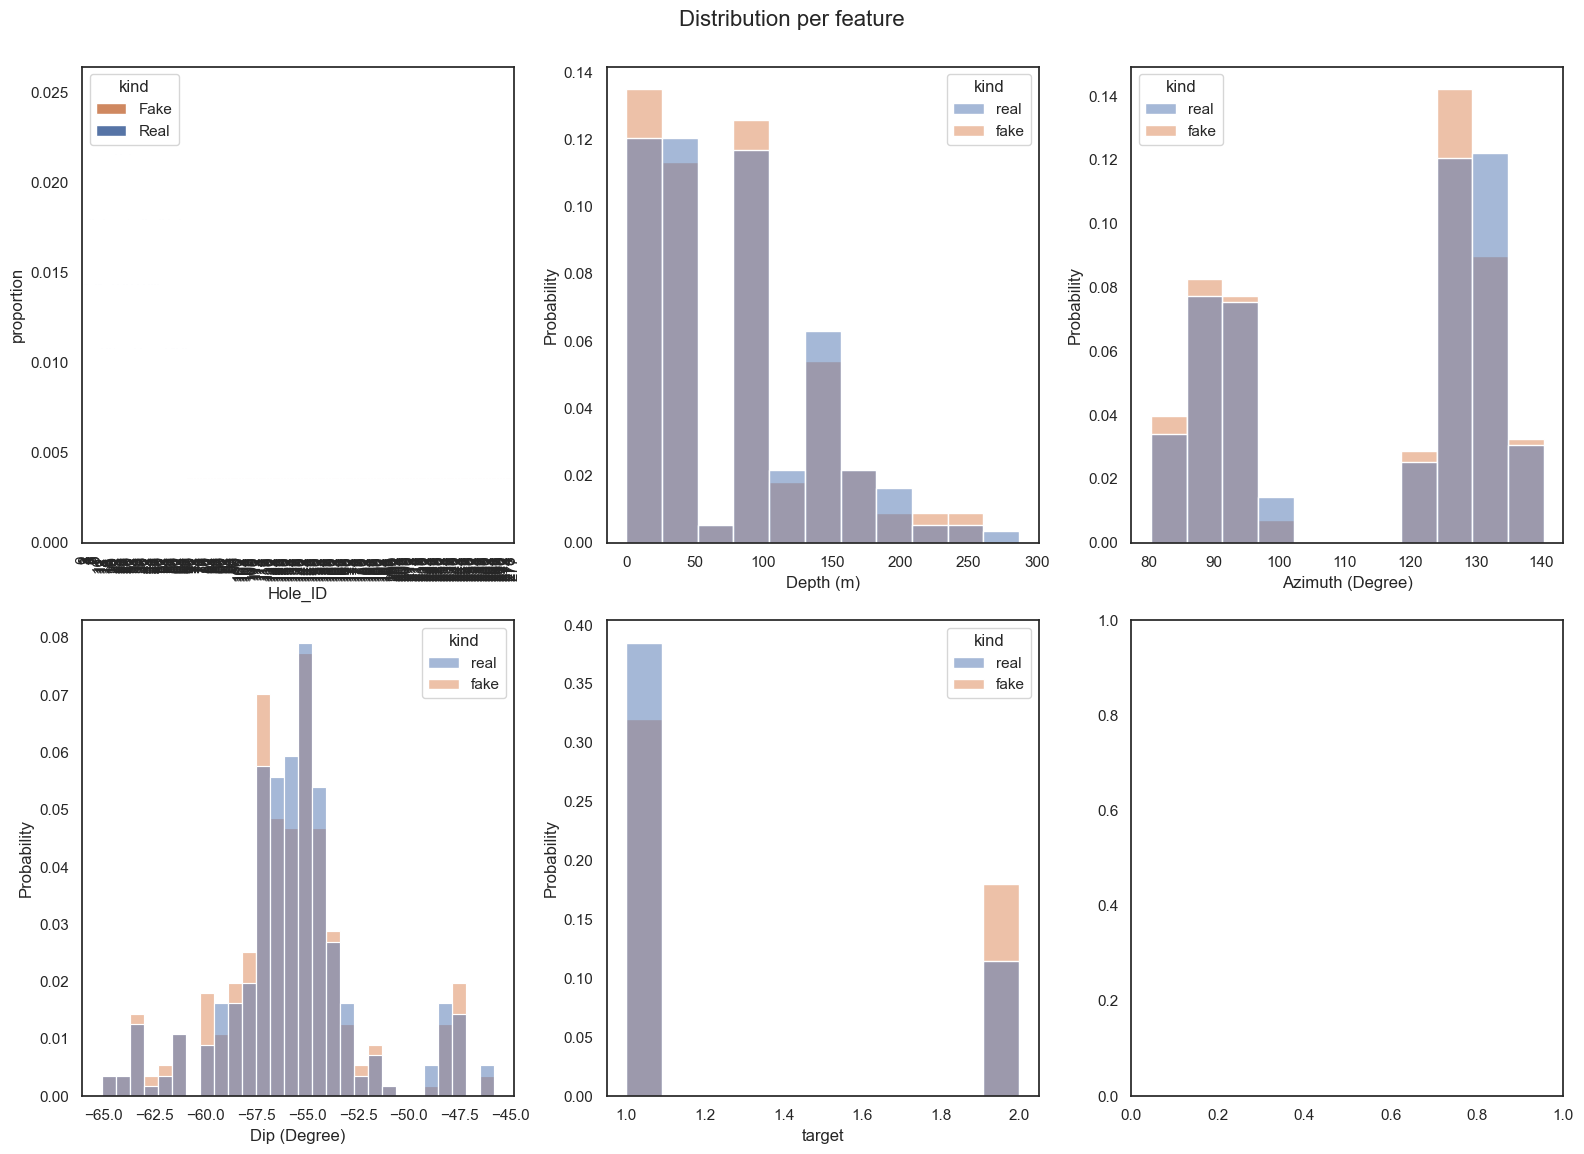

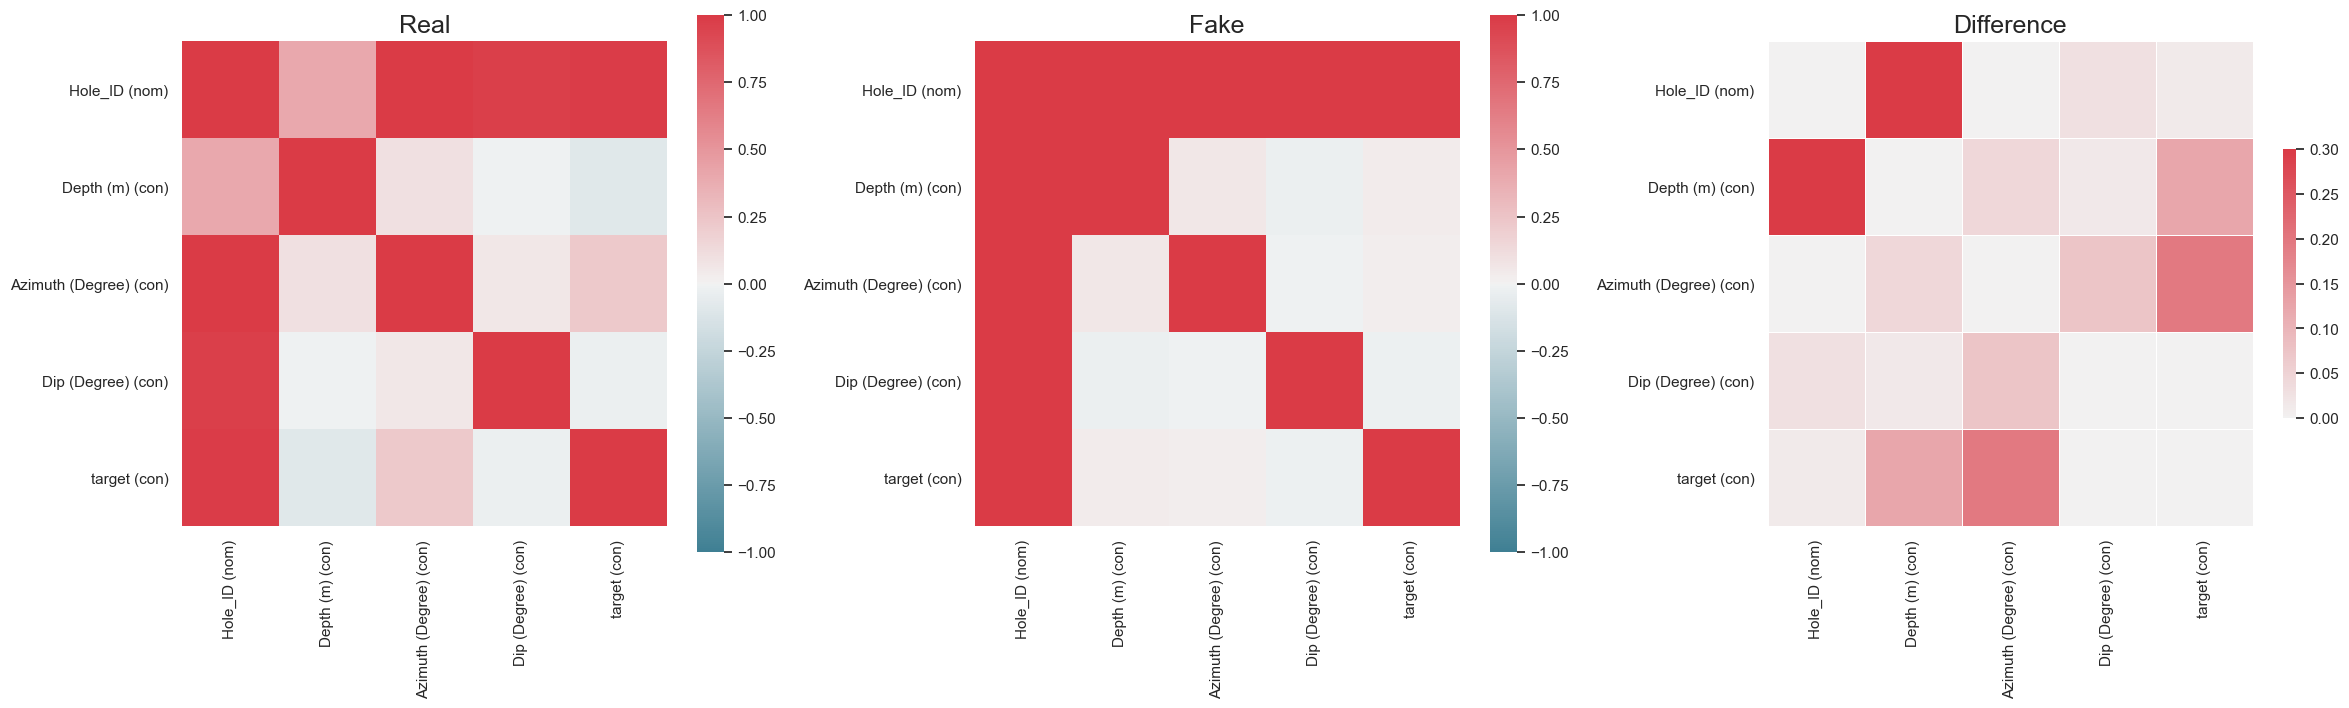

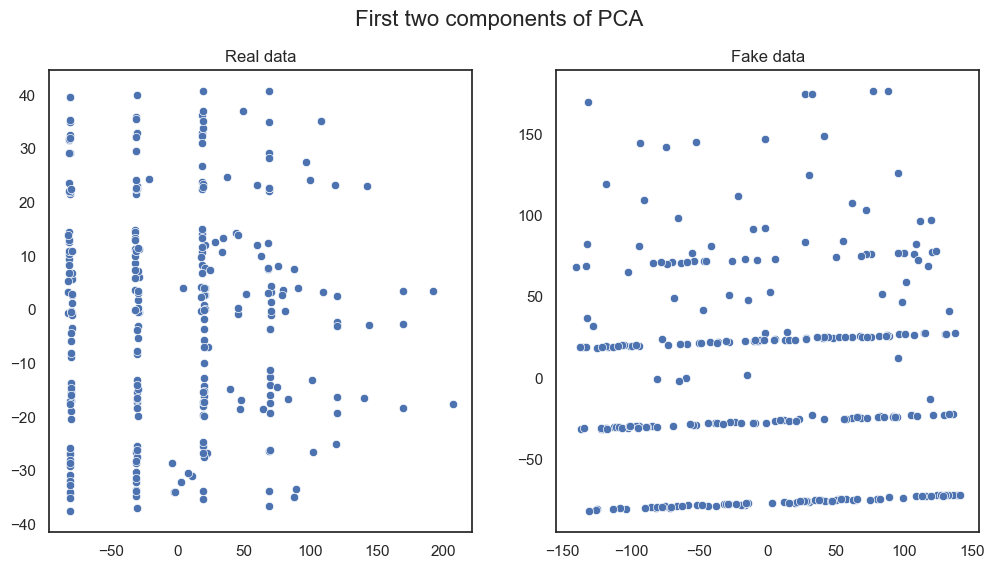

In [27]:
table_evaluator.visual_evaluation()

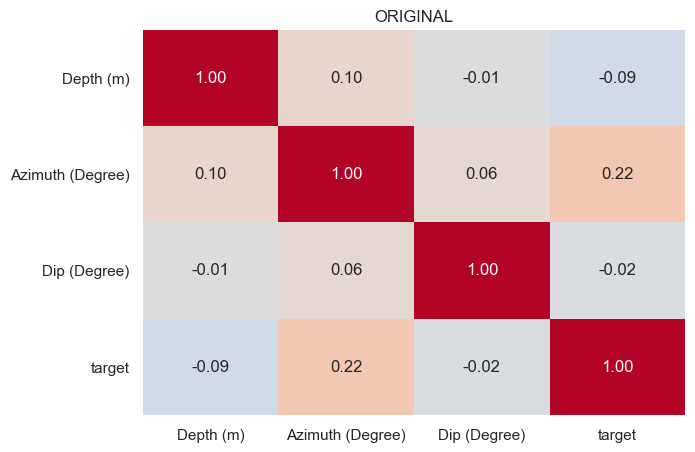

In [28]:
# Compute the correlation matrix
corr = survey.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('ORIGINAL')
plt.show()

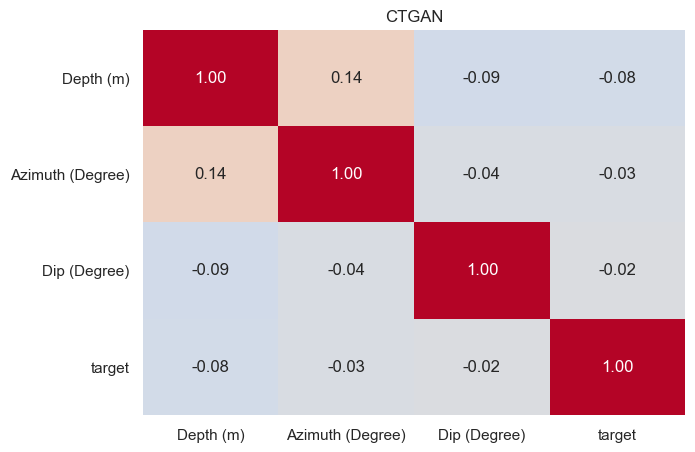

In [29]:
# Compute the correlation matrix
corr1 = new_survey.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr1, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('CTGAN')
plt.show()

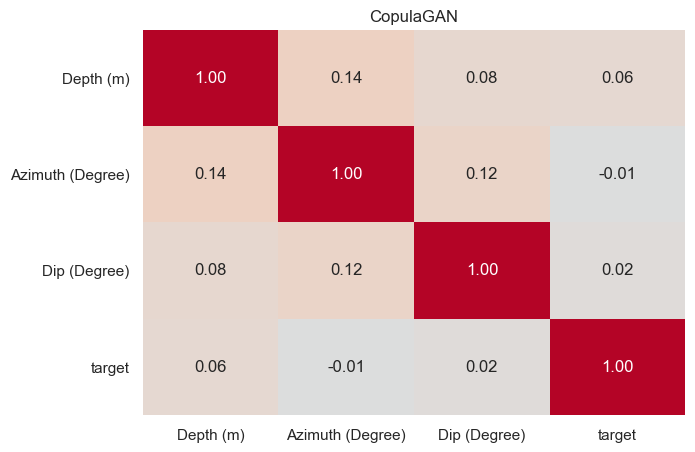

In [30]:
# Compute the correlation matrix
corr2 = new_data.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr2, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('CopulaGAN')
plt.show()

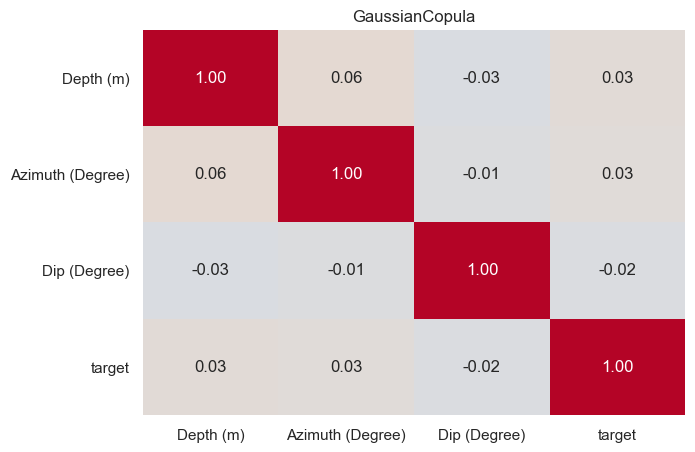

In [31]:
# Compute the correlation matrix
corr3 = new_data2.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr3, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('GaussianCopula')
plt.show()

In [32]:
from scipy.stats import pearsonr

In [36]:
# Flatten the correlation matrices into 1-D arrays
corr = corr.flatten()
corr1 = corr1.values.flatten()

# Compute the Pearson correlation coefficient between the two 1-D arrays
r, p = pearsonr(corr, corr1)

# Calculate the percentage of correlation coefficient
percentage_corr = r * 100

# Print the percentage of correlation coefficient
print("Percentage of correlation coefficient between original and CTGAN: ", percentage_corr, "%")

Percentage of correlation coefficient between original and CTGAN:  98.04512294793572 %


In [38]:
# Flatten the correlation matrices into 1-D arrays
corr = corr.flatten()
corr2 = corr2.values.flatten()

# Compute the Pearson correlation coefficient between the two 1-D arrays
r, p = pearsonr(corr, corr2)

# Calculate the percentage of correlation coefficient
percentage_corr = r * 100

# Print the percentage of correlation coefficient
print("Percentage of correlation coefficient between original and CopulaGAN: ", percentage_corr, "%")

Percentage of correlation coefficient between original and CopulaGAN:  96.93275658139142 %


In [39]:
# Flatten the correlation matrices into 1-D arrays
corr = corr.flatten()
corr3 = corr3.values.flatten()

# Compute the Pearson correlation coefficient between the two 1-D arrays
r, p = pearsonr(corr, corr3)

# Calculate the percentage of correlation coefficient
percentage_corr = r * 100

# Print the percentage of correlation coefficient
print("Percentage of correlation coefficient between original and GaussianCopula: ", percentage_corr, "%")

Percentage of correlation coefficient between original and GaussianCopula:  98.11542736764852 %
